In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('For_Predictive_Model.csv')

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


# Temp and Atemp are highly correlated. So, there would not be significant effect if we drop the atemp column

In [4]:
data.drop(['datetime','atemp'],axis=1,inplace=True)

In [5]:
data.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_week
0,1,0,0,1,9.84,81,0.0,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,80,0.0,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,80,0.0,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,75,0.0,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,75,0.0,0,1,1,2011,1,1,4,5


# Season, Holiday, Workingday, Weather are categorical variable. So, we convert them to dummy variable

In [6]:
data=pd.get_dummies(columns=['season','holiday','workingday','weather'],data=data,drop_first=True)

In [7]:
data.head()

,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_week,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
0,9.84,81,0.0,3,13,16,2011,1,1,0,5,0,0,0,0,0,0,0,0
1,9.02,80,0.0,8,32,40,2011,1,1,1,5,0,0,0,0,0,0,0,0
2,9.02,80,0.0,5,27,32,2011,1,1,2,5,0,0,0,0,0,0,0,0
3,9.84,75,0.0,3,10,13,2011,1,1,3,5,0,0,0,0,0,0,0,0
4,9.84,75,0.0,0,1,1,2011,1,1,4,5,0,0,0,0,0,0,0,0


# Converting other quantative feature in the range of 0-1

In [8]:
quantative_cols=['temp','humidity','windspeed']

In [9]:
for column in quantative_cols:
    data[column]=data[column]/data[column].max()

In [10]:
data.head()

,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_week,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.81,0.0,3,13,16,2011,1,1,0,5,0,0,0,0,0,0,0,0
1,0.22,0.80,0.0,8,32,40,2011,1,1,1,5,0,0,0,0,0,0,0,0
2,0.22,0.80,0.0,5,27,32,2011,1,1,2,5,0,0,0,0,0,0,0,0
3,0.24,0.75,0.0,3,10,13,2011,1,1,3,5,0,0,0,0,0,0,0,0
4,0.24,0.75,0.0,0,1,1,2011,1,1,4,5,0,0,0,0,0,0,0,0


In [11]:
X=data.drop(['casual','registered','count'],axis=1)

In [12]:
Y=data['count']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
model=RandomForestRegressor()

In [17]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [18]:
model.score(X_test,Y_test)

0.9526135754057323

In [19]:
prediction=model.predict(X_test)

In [20]:
prediction

array([144.  ,  29.93, 156.24, ..., 465.83,   7.13, 131.62])

In [21]:
prediction=prediction.astype('int32')

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
prediction

array([144,  29, 156, ..., 465,   7, 131])

In [24]:
mean_squared_error(Y_test,prediction)

1563.12580348944

In [25]:
import joblib

In [26]:
joblib.dump(model,'model.sav')

['model.sav']

In [27]:
model.feature_importances_

array([9.30709688e-02, 3.04679790e-02, 7.97471180e-03, 8.66898873e-02,
       5.57812566e-02, 1.11559721e-02, 6.04751871e-01, 3.39622654e-02,
       1.19102522e-03, 9.92205043e-04, 9.67167261e-04, 1.94622565e-03,
       5.69831483e-02, 1.49521661e-03, 1.25694295e-02, 6.70925239e-07])

In [28]:
import seaborn as sns

In [29]:
imp=model.feature_importances_
col=X_train.columns

<AxesSubplot:>

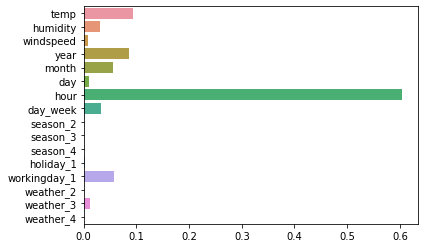

In [31]:
sns.barplot(x=imp,y=col)

# Feature importance can be used to improve a predictive model.